##### Import necessary Libaries

In [1]:
# Libaries for data read
import numpy as np
import pandas as pd
from datetime import datetime

# Libaries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libaries for model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# other's
import warnings

In [2]:
# Let's hide Warnings
warnings.filterwarnings("ignore")

##### Read Dataset

In [4]:
df = pd.read_csv("CarData.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##### Handle Mising / NAN value

In [9]:
# Let's check the missing value 
df.isnull().sum() # There is no missing value feature

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

##### Data Cleaning 

In [10]:
# Let's Final Dataset without car name feature
dataset = df.drop(["Car_Name"], axis=1)
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


##### Handle year feature

In [11]:
# Let's create a current year feature
current_year = datetime.now().year
dataset["Current_year"] = current_year
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [12]:
# Let's create Number of years the car uses 
dataset["Num_Years"] = dataset["Current_year"] - dataset["Year"]
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Num_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
# Let's drop unnecessary features like- "Year", "Current_year"
dataset.drop(["Year", "Current_year"], axis=1, inplace=True)
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


##### Handle Categorical features

In [14]:
# Let's find categorical features 
cate_features = [feature for feature in dataset.columns if dataset[feature].dtypes == "O"]
cate_features

['Fuel_Type', 'Seller_Type', 'Transmission']

In [15]:
# Let's create a function to do "One Hot Encoding" of Categorical Features 
encode = pd.get_dummies(dataset[cate_features], drop_first=True)
# concatanet with dataset
data = pd.concat([dataset, encode], axis=1)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,1,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,1,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,1,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,0,1


In [16]:
# Make final dataset for model
final_dataset = data.drop(cate_features, axis=1)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Features Correlations
    If we have so many features then we can check correlation among those features 

In [17]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


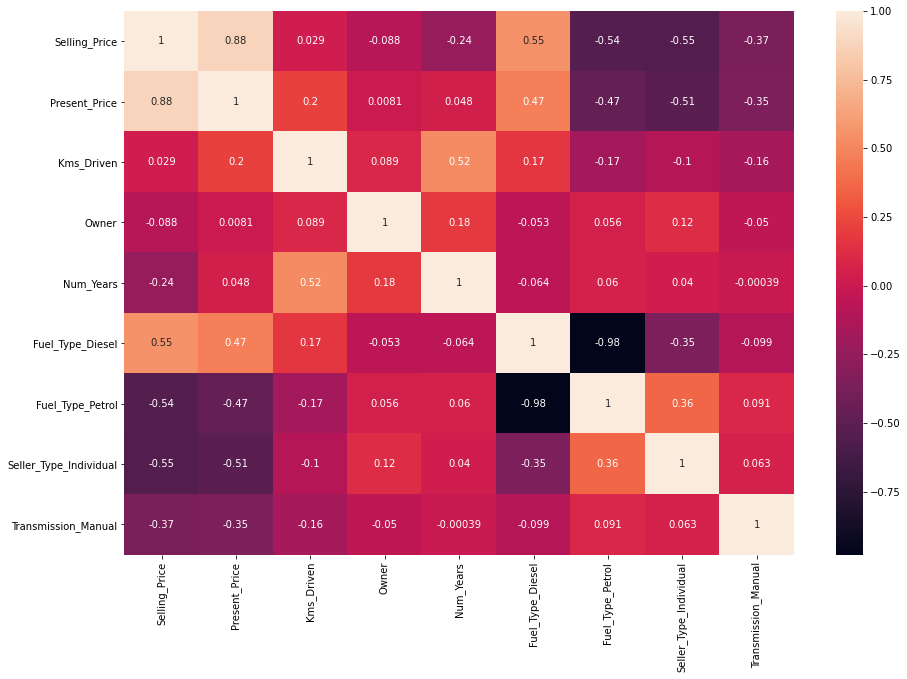

In [18]:
corr = final_dataset.corr()
corr_features = corr.index
plt.figure(figsize=(15,10))
sns.heatmap(final_dataset[corr_features].corr(), annot=True)

### Features Importance finding
    If we have so many features, then we can work on Features Importance  

In [19]:
# Lets divide X & Y dataset
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

In [20]:
# Features Importance 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

[0.41773175 0.03855218 0.00050966 0.08178433 0.19707666 0.01794392
 0.12971721 0.11668429]


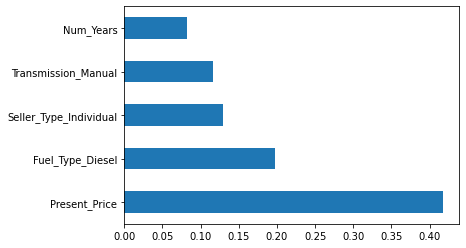

In [21]:
# Let's find best 5 features by using plot
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

## Build a Model

In [32]:
# Let's split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [33]:
# create model and train the model with Random Forest Regressor
cpp_model = RandomForestRegressor()
cpp_model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
# Let's test the model
y_pred = cpp_model.predict(X_test)
y_pred

array([ 3.2755,  1.172 , 10.5095,  4.9474, 11.247 ,  8.9795,  5.6255,
        0.4586,  0.4541,  5.3563,  9.8817,  6.1445,  0.527 ,  1.1283,
        8.6285,  0.4684,  0.5338,  5.519 ,  0.4528,  8.107 ,  4.2915,
        2.48  ,  1.8835,  0.4556,  1.635 ,  0.8226,  5.0945,  0.5656,
        3.3979,  4.459 ,  5.723 ,  3.4342,  0.5555,  7.1925,  2.4345,
        5.532 ,  1.0571,  3.6338,  1.0322,  1.1575,  0.597 ,  2.4499,
       16.1955,  6.7289,  4.265 , 22.6265,  9.4038,  0.7488,  2.973 ,
        0.454 ,  1.4315,  6.9405,  1.3015,  0.662 ,  2.817 ,  6.701 ,
        0.2033,  0.4632,  0.2892,  0.7295,  0.4183])

In [35]:
# Let's compare test result with actual
pred_dataset = pd.DataFrame({"Actual_Data": y_test, "Predict_Data": y_pred})
pred_dataset.head()

,Actual_Data,Predict_Data
18,3.25,3.2755
111,1.15,1.1720
237,11.25,10.5095
245,5.20,4.9474
295,8.55,11.2470


#### Let's check the model score

In [36]:
# Model score
cpp_model.score(X_train, y_train)

0.989593792050043

In [37]:
# r2 Score of Model
R2Score = r2_score(y_test, y_pred)
R2Score

0.9664248353823452